# Deterministic Model for Weight Loss
This is a Python implementation of the deterministic model of weight loss proposed by Diana M. Thomas et al.
Thomas' paper containing specific details on the model can be found at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2764961/.

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt


Original Energy Intake: 2677.8 kcal
Reduced Energy Intake: 2008.3 kcal
Energy Reduction: 669.4 kcal
Percentage Reduction: 25.0%

Original Weight: 60.0 kg
Final Weight: 54.2 kg
Weight Reduction: 5.8 kg
Percentage Reduction: 9.7%



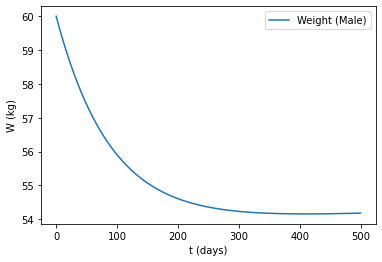

In [18]:
# define universal constants used in model
a = 293                  # male = 293     female = 248     for resting metabolic rate (RMR)    
p = 0.4330               # male = 0.4330  female = 0.4356  for RMR    
y = 5.92                 # male = 5.92    female = 5.09    for RMR    
k = 0.02                 #                                 for RMR   
beta = 0.075             #                                 for dietary induced thermogenesis (DIT)
r = 0.67                 #                                 for non-exercise activity thermogenesis (NEAT)
omega = 0.56             # male = 0.56    female = 0.32    for alpha 
alpha = 1+omega          #                                 for W
cl = 1100                # caloric value of fat-free mass  for gamma                                               
cf = 9500                # caloric value of fat mass       for gamma  
f = 0.30                 # proportion of fat-free mass     for gamma
gamma = cl*omega*f+cf    #                                 for dF/dt

# define case dependent constants used in model
I = 0.75*2677.8          # energy intake in kcal/day                  
W0 = 60                  # initial weight in kg                       
A0 = 20                  # initial age in years                       
dt = 1                   # size of time step used in each Euler iteration in days

# initialize starting conditions
t = 0 
W = W0        
RMR0 = a*math.pow(W,p) - y*(A0+t/365)
E0 = RMR0/0.6            # energy expenditure is 60% of RMR
DIT0 = 0.075*E0          # DIT is 7.5% of E
NEAT0 = 0.1*E0           # NEAT is 10% of E
EAT0 = E0 - (RMR0+DIT0+NEAT0)
m = EAT0/W               # proportionality constant for exercise-activity thermogenesis (EAT)
C = NEAT0 - r/(1-r)*(RMR0+DIT0+EAT0) # constant for NEAT

# initialize lists for weight and time
Wsim = []
tsim = []

# append initial values to lists
Wsim.append(W)  
tsim.append(t)           

# calculate new W after each time iteration 
while t < 500:
    RMR = (1-k)*(a*math.pow(W,p)- y*(A0+t/365))
    DIT = beta*I
    EAT = m*W
    NEAT = r/(1-r)*(RMR+DIT+EAT)+C
    dF = (I - (RMR+DIT+EAT+NEAT))/gamma
    W = W + dF*alpha*dt
    t = t + dt
    Wsim.append(W)         # store updated W
    tsim.append(t)         # store updated time

# display original intake, reduced intake, original weight, reduced weight 
print ("Original Energy Intake: " + "{:.1f}".format(round(E0, 2)) + " kcal")
print ("Reduced Energy Intake: " + "{:.1f}".format(round(I, 2)) + " kcal")
print ("Energy Reduction: " + "{:.1f}".format(round((E0-I), 2)) +" kcal")
print ("Percentage Reduction: " + "{:.1f}".format(round((E0-I)/E0*100, 2)) +"%")

print ("Original Weight: " + "{:.1f}".format(round(W0, 2)) + " kg")
print ("Final Weight: " + "{:.1f}".format(round(W, 2)) + " kg")
print ("Weight Reduction: " + "{:.1f}".format(round((W0-W), 2)) +" kg")
print ("Percentage Reduction: " + "{:.1f}".format(round((W0-W)/W0*100, 2)) +"%")

# plot weight of subject over time
plt.figure 
plt.plot(tsim, Wsim, label= "Weight")
plt.xlabel("t (days)")
plt.ylabel("W (kg)")
plt.legend()
plt.show()    